In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from pylab import rcParams

In [2]:
df = pd.read_csv('AirPassengers.csv')
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [3]:
df.rename(columns = {'#Passengers' : 'Passengers'}, inplace = True)
df

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
df['Month'] = pd.to_datetime(df['Month'])

In [5]:
df.set_index( "Month" , inplace= True )

Text(0, 0.5, 'Passengers')

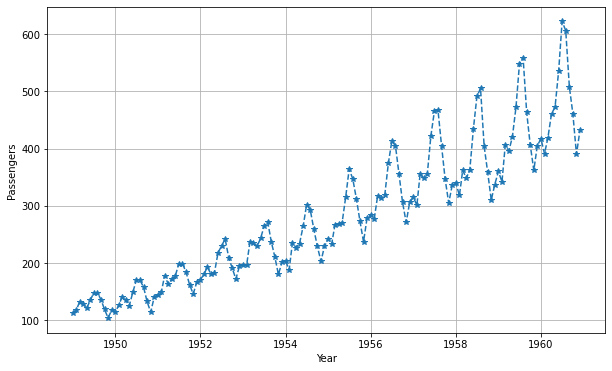

In [6]:
plt.figure(figsize=( 10 , 6 ))
plt.plot(df.index, df.Passengers, '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'Year' )
plt.ylabel( 'Passengers' )

In [7]:
#check for missing values
df.isnull().values.any()

False

In [8]:
#missing values, we will make a copy of our dataset and delete some values at random.
df_copy = df.copy()

rows = df_copy.sample(frac= 0.1 , random_state= 0 )
rows[ 'Passengers' ] = np.nan
df_copy.loc[rows.index, 'Passengers' ] = rows[ 'Passengers' ]


In [9]:
df_copy.isnull().sum()

Passengers    14
dtype: int64

In [10]:
#df_copy_ffill = df_copy.fillna(method= 'ffill' )

df_copy_bfill = df_copy.fillna(method= 'bfill' )

In [11]:
#df_copy_ffill.isnull().sum()

df_copy_bfill.isnull().sum()

Passengers    0
dtype: int64

In [12]:
#Filling missing data by interpolation

df_copy_LIF = df_copy.interpolate(method= 'linear' , limit_direction= 'forward' )
df_copy_LIF.isnull().sum()

Passengers    0
dtype: int64

In [13]:
df_copy_LIB = df_copy.interpolate(method= 'linear' , limit_direction= 'backward' )
df_copy_LIB.isnull().sum()

Passengers    0
dtype: int64

In [14]:
#Downsample to quarterly data points
df_quarterly = df.resample( '3M' ).mean()

Text(0, 0.5, 'Passengers')

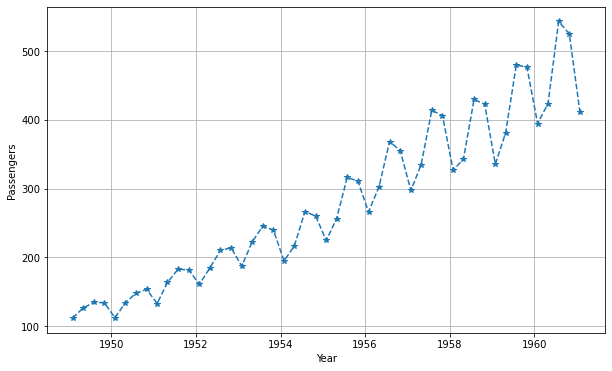

In [15]:
plt.figure(figsize=( 10 , 6 ))
plt.plot(df_quarterly.index, df_quarterly.Passengers, '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'Year' )
plt.ylabel( 'Passengers' )

In [16]:
#Upsample to daily data points
df_daily = df.resample( 'D' ).mean()

Text(0, 0.5, 'Passengers')

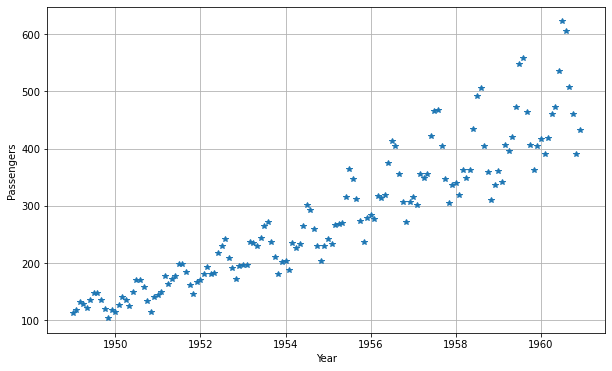

In [17]:
plt.figure(figsize=( 10 , 6 ))
plt.plot(df_daily.index, df_daily.Passengers, '--' , marker= '*' , )
plt.grid()
plt.xlabel( 'Year' )
plt.ylabel( 'Passengers' )

In [18]:
#moving avg smoothing

df_MA = df.copy()
MA = df_MA[ 'Passengers' ].rolling( 12 ).mean()

Text(0, 0.5, 'Passengers')

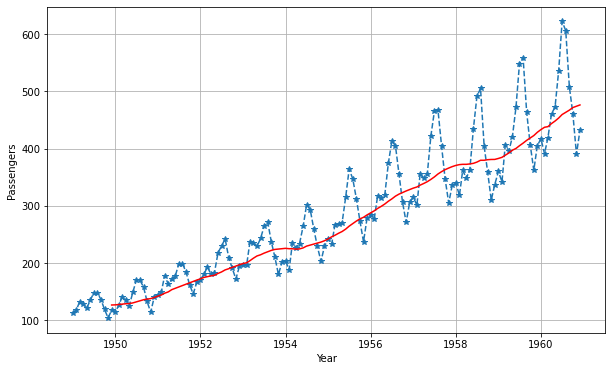

In [19]:
plt.figure(figsize=( 10 , 6 ))
plt.plot(df_MA.index, df_MA.Passengers, '--' , marker= '*' , )
plt.plot(df_MA.rolling( 12 ).mean(), color= 'red' )
plt.grid()
plt.xlabel( 'Year' )
plt.ylabel( 'Passengers' )

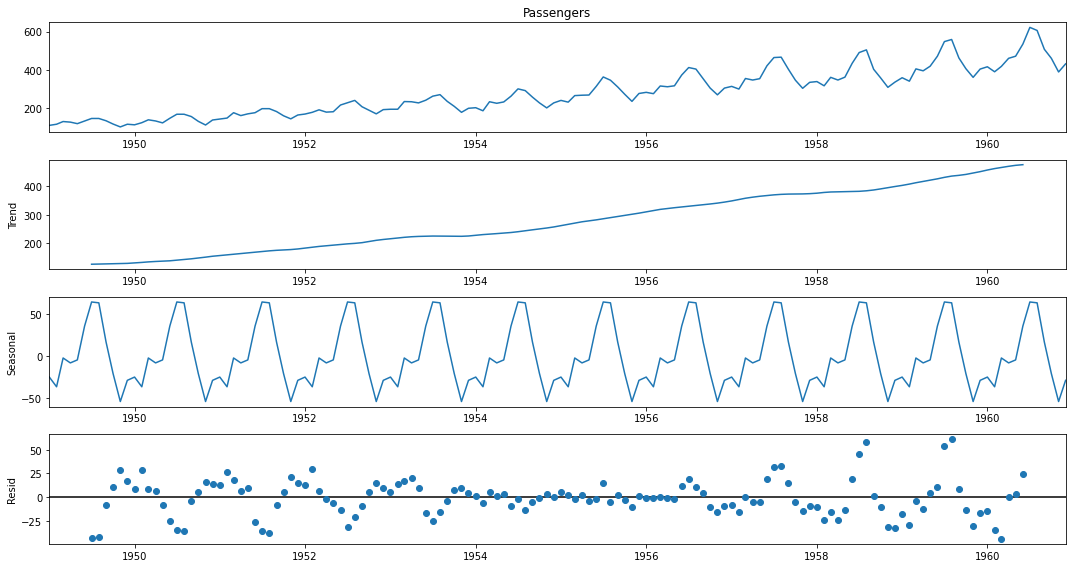

In [20]:
rcParams[ 'figure.figsize' ] = 15 , 8
decompose_series = sm.tsa.seasonal_decompose(df[ 'Passengers' ], model= 'additive' )
decompose_series.plot()
plt.show()

In [21]:
# #The decomposed time series show an obvious increasing trend and seasonality variations.
# Recall that we have initially plotted the moving average on the last 12 months which showed
# that it varies with time. This suggests that the data is not stationary. We will now perform
# an ADF test to confirm this speculation

In [22]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df[ 'Passengers' ])
print( f'ADF Statistic: {adf_result[ 0 ]} ' )
print( f'p-value: {adf_result[ 1 ]} ' )
print( f'No. of lags used: {adf_result[ 2 ]} ' )
print( f'No. of observations used : {adf_result[ 3 ]} ' )
print( 'Critical Values:' )

for k, v in adf_result[ 4 ].items():
    print( f' {k} : {v} ' )

ADF Statistic: 0.8153688792060456 
p-value: 0.991880243437641 
No. of lags used: 13 
No. of observations used : 130 
Critical Values:
 1% : -3.4816817173418295 
 5% : -2.8840418343195267 
 10% : -2.578770059171598 


In [23]:
#From the results obtained, the p-value is greater than the critical value at a 5%
#significance level and, the ADF statistic is greater that any of the critical values
#obtain. #This confirms that the series is indeed non-stationary.

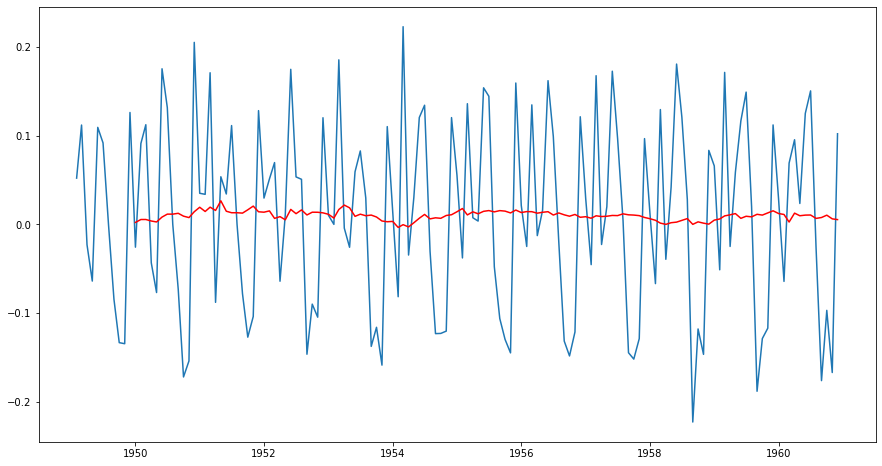

In [24]:
#Convert time series to stationary by removing trend and seasonality
#Transformation and Differencing

df_log = np.log(df)
df_diff = df_log.diff(periods= 1 )
plt.plot(df_diff.index, df_diff.Passengers, '-' )
plt.plot(df_diff.rolling( 12 ).mean(), color= 'red' )

C:\Users\HP\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


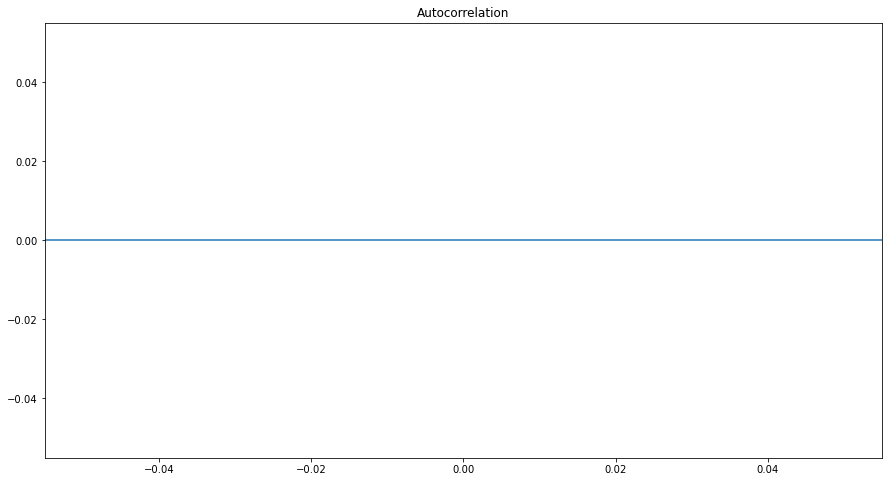

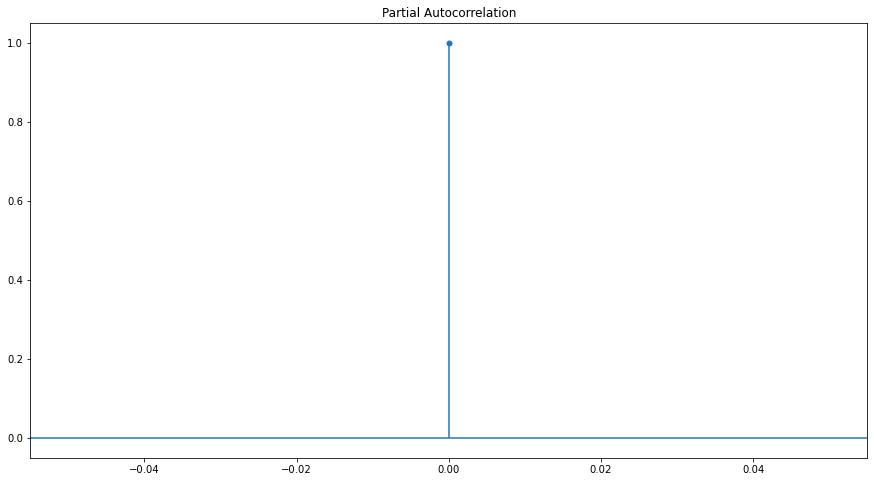

In [25]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#ACF
plot_acf(df_diff, lags = range( 0 , 20 ))
plt.show()

#PACF
plot_pacf(df_diff, lags = range( 0 , 20 ))
plt.show()

In [26]:
#The shaded regions in the plots are the confidence intervals. The lags where the PACF #and
#ACF charts cross this region are the values for p and q respectively. In both plots, #p=q=1.
#The shaded regions in the plots are the confidence intervals. The lags where the PACF and
#ACF charts cross this region are the values for p and q respectively.
#In the ACF plot, there is one lag that crosses the significance level hence, q=1. Similarly
#in the PACF plot, p=2

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


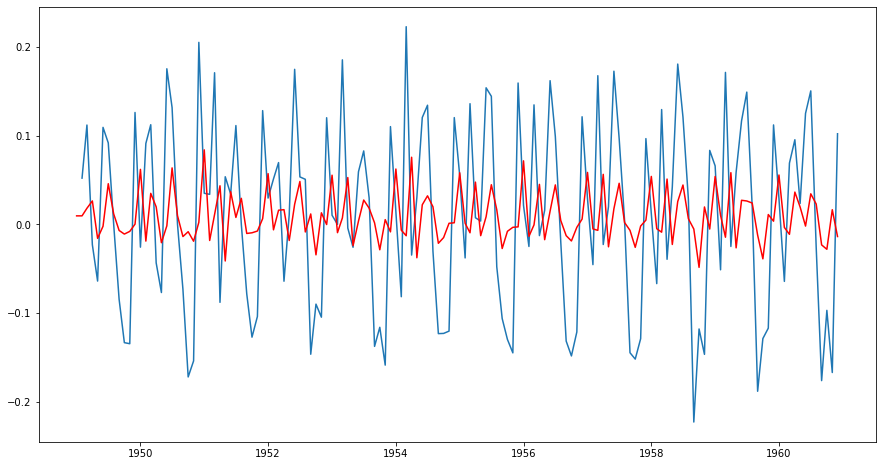

In [27]:
#AR, MA and ARIMA

#from sm.tsa.arima_model import ARIMA

#(p,d,q)

AR_model = sm.tsa.arima.ARIMA(df_diff, order=( 2 , 0 , 0 ))
AR_model_results = AR_model.fit()
plt.plot(df_diff)
plt.plot(AR_model_results.fittedvalues, color= 'red' )

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


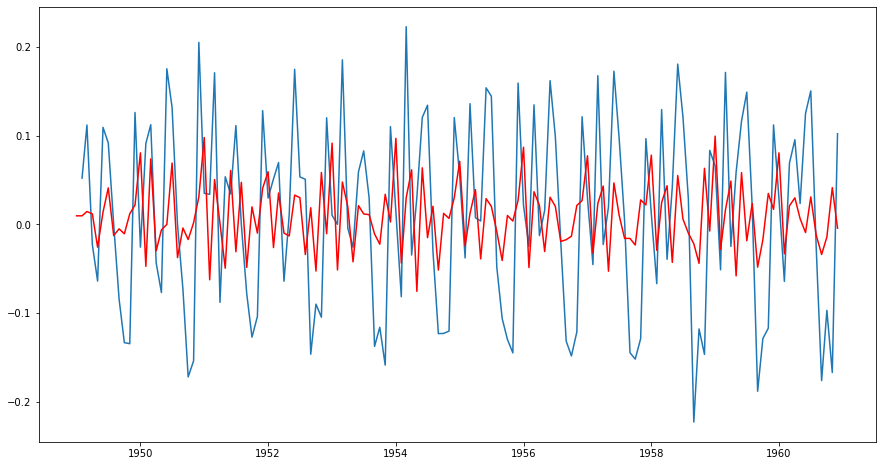

In [28]:
MA_model = sm.tsa.arima.ARIMA(df_diff, order=( 0 , 0 , 2 ))
MA_model_results = MA_model.fit()
plt.plot(df_diff)
plt.plot(MA_model_results.fittedvalues, color= 'red' )

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


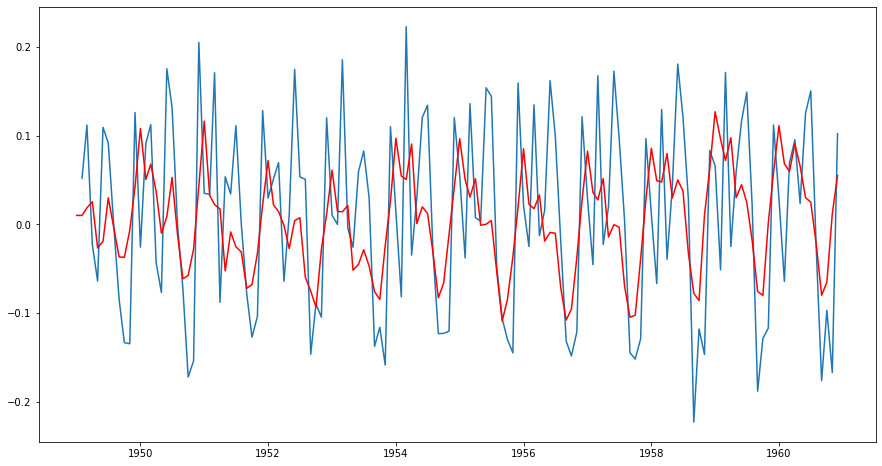

In [29]:
ARIMA_model = sm.tsa.arima.ARIMA(df_diff, order=( 2 , 0 , 1 ))
ARIMA_results = ARIMA_model.fit()
plt.plot(df_diff)
plt.plot(ARIMA_results.fittedvalues, color= 'red' )

# STAGE E CLASS TASK

In [30]:
from prophet import Prophet

ModuleNotFoundError: No module named 'prophet'